In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [36]:
#Loading the data
df = pd.read_csv("/content/top_insta_influencers_data.csv")

#Displaying the first few rows of the dataframe
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [37]:
#Summary statistics
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


**Data** **Cleaning**

In [38]:
#Data types
df.dtypes

rank                  int64
channel_info         object
influence_score       int64
posts                object
followers            object
avg_likes            object
60_day_eng_rate      object
new_post_avg_like    object
total_likes          object
country              object
dtype: object

In [39]:
#values with 'k' suffixes are converted to numeric values in a DataFrame column 'posts'
def convert_to_numeric(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    else:
        return float(value)


df['posts'] = df['posts'].apply(convert_to_numeric)

In [40]:
#converting values in the 'followers' column to numeric format wiithout the m suffix
def convert_to_numeric(value):
    if 'm' in value:
        return float(value.replace('m', '')) * 1000000
    else:
        return float(value)


df['followers'] = df['followers'].apply(convert_to_numeric)

In [41]:
#converting 'k' or 'm' suffixes in the 'avg_likes' column

def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1000
        elif 'm' in value:
            return float(value.replace('m', '')) * 1000000
    return value


df['avg_likes'] = df['avg_likes'].apply(convert_to_numeric)

In [42]:
#convertig the values in the '60_day_eng_rate' column  from string type to float type. It removes the '%'

try:
    df['60_day_eng_rate'] = df['60_day_eng_rate'].str.rstrip('%').astype(float)
except ValueError:
    print("Error: Unable to convert some values to float.")

# Step 2: Convert the numeric values to percentages
df['60_day_eng_rate'] /= 100
df['60_day_eng_rate'] *= 100

In [43]:
#converting string of numbers with 'k' or 'm' suffixes into numeric value in new_post_avg_like' column
def convert_to_numeric(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    elif 'm' in value:
        return float(value.replace('m', '')) * 1000000
    else:
        return float(value)


df['new_post_avg_like'] = df['new_post_avg_like'].apply(convert_to_numeric)

In [44]:
#converts string of numbers with 'm' or 'b' suffixes into their corresponding numeric values
def convert_to_numeric(value):
    if 'm' in value:
        return float(value.replace('m', '')) * 1000000
    elif 'b' in value:
        return float(value.replace('b', '')) * 1000000000
    else:
        return float(value)


df['total_likes'] = df['total_likes'].apply(convert_to_numeric)

In [45]:
#checking to see if the data types were changed
df.dtypes

rank                   int64
channel_info          object
influence_score        int64
posts                float64
followers            float64
avg_likes            float64
60_day_eng_rate      float64
new_post_avg_like    float64
total_likes          float64
country               object
dtype: object

In [46]:
#first 5 rows
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States


In [47]:
#checking for missing values
df.isna().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       1
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [48]:
# removing the 'country' and 'channel_info' columns
df.drop('country', axis=1, inplace=True)
df.drop('channel_info', axis=1, inplace=True)

In [49]:
#any rows contain at least one missing value will be removed
df.dropna(inplace=True)

In [50]:
#checking to see if they were removed
df.isna().sum()

rank                 0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
dtype: int64

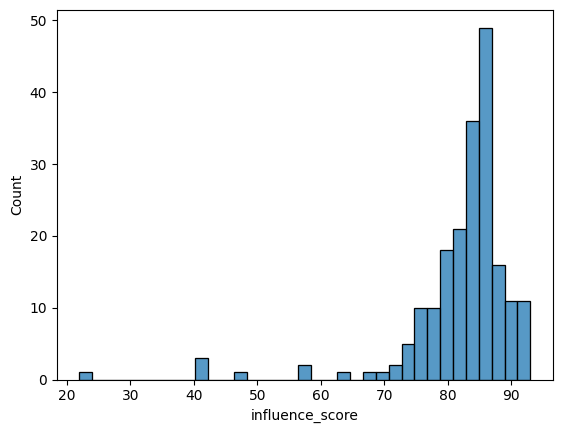

In [51]:
#creating a histogram based on the values in the 'influence_score' column to determine the threshold to set for "good influencer"
sns.histplot(df['influence_score'])
plt.show()

#looks like 85 has the highest count, therefore anyone above 85 would be considered a good influencer

In [52]:
#running if else loop to determine who are the good influencer:
#"Yes" if the score is greater than 85, indicating that the person is a good influencer
#"No" which means they are not a good influencer

def is_good_influencer(score):
    if score > 85:
        return "Yes"
    else:
        return "No"

# Applying the function to create the 'good influencer?' column and storing the outcome

df['good influencer?'] = df['influence_score'].apply(is_good_influencer)


In [53]:
#printng the scores to check the good influencer? outcome
print(df)

     rank  influence_score   posts    followers  avg_likes  60_day_eng_rate  \
0       1               92  3300.0  475800000.0  8700000.0             1.39   
1       2               91  6900.0  366200000.0  8300000.0             1.62   
2       3               90   890.0  357300000.0  6800000.0             1.24   
3       4               93  1800.0  342700000.0  6200000.0             0.97   
4       5               91  6800.0  334100000.0  1900000.0             0.20   
..    ...              ...     ...          ...        ...              ...   
195   196               71  2300.0   33200000.0   623800.0             1.40   
196   197               81  3800.0   33200000.0   390400.0             0.64   
197   198               79   770.0   33200000.0   193300.0             0.26   
198   199               78  2300.0   33000000.0   719600.0             1.42   
199   200               80  4200.0   32800000.0   232200.0             0.30   

     new_post_avg_like   total_likes good influence

In [54]:
#running summary statistics again after data cleaning and processing
df.describe()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,199.000000,199.000000,199.000000,1.990000e+02,1.990000e+02,199.000000,1.990000e+02,1.990000e+02
mean,100.160804,81.814070,3516.884422,7.761256e+07,1.741310e+06,1.902010,1.214204e+06,3.670465e+09
std,57.825532,8.900153,3476.215047,7.381699e+07,2.100856e+06,3.329719,1.861019e+06,5.573215e+09
min,1.000000,22.000000,10.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07
25%,50.500000,80.000000,950.000000,4.005000e+07,5.031000e+05,0.410000,1.983500e+05,9.937000e+08
50%,100.000000,84.000000,2100.000000,5.020000e+07,1.100000e+06,0.880000,5.327000e+05,2.000000e+09
75%,149.500000,86.000000,5050.000000,6.890000e+07,2.100000e+06,2.035000,1.350000e+06,4.000000e+09
max,200.000000,93.000000,17500.000000,4.758000e+08,1.540000e+07,26.410000,1.260000e+07,5.740000e+10


**Data** **Visualization**

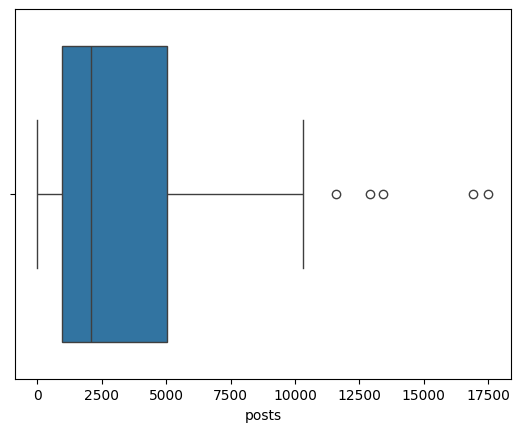

In [55]:
#boxplot for 'posts'
sns.boxplot(data = df, x = df['posts'])
plt.show()

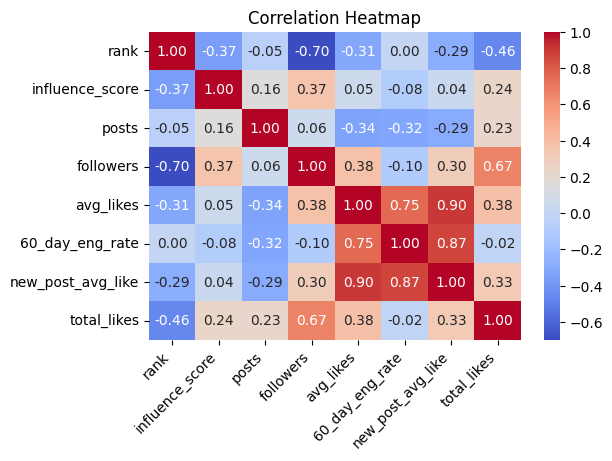

In [56]:
#generating correlation data
df_witout_dependent = df.drop(columns='good influencer?', axis=1)
corr_map = df_witout_dependent.corr()

#creating heat map for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(corr_map, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation = 45,  ha='right')
plt.show()

Looks like *avg_likes* and *new_post_avg_like* are highly correlated, therefore we will not be using *new_post_avg_like* in our model because of the risk of multicollinearity

**Decision** **Tree**

In [57]:
#Decision Tree, setting up variables
X_dt = df[['posts','followers','avg_likes','60_day_eng_rate','total_likes']]
Y_dt = df[['good influencer?']]

In [58]:
#building decision tree model
X_dt = pd.get_dummies(X_dt, drop_first=True)

X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y_dt, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train_dt, Y_train_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

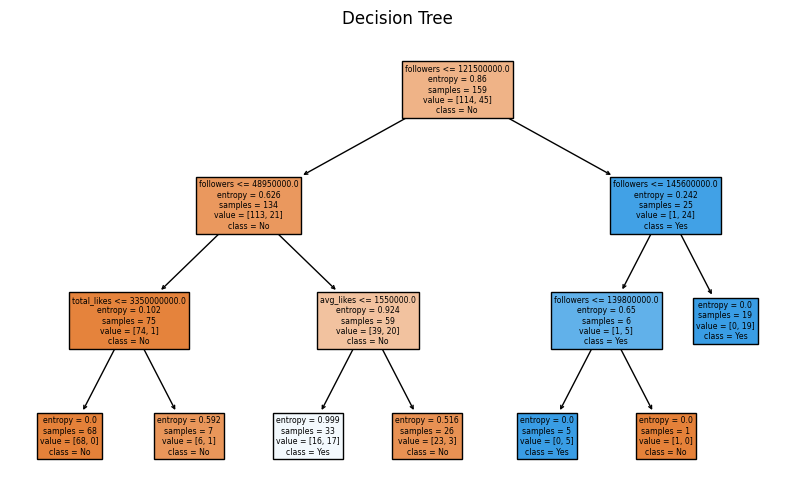

In [59]:
#plotting the Decison Tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=list(X_dt.columns), class_names=list(model.classes_), )
plt.title("Decision Tree")
plt.show()


In [60]:
#Model Evauation
#calculating the accuracy of the prediction and then printing the accuracy score
Y_pred_dt = model.predict(X_test_dt)
accuracy_dt = accuracy_score(Y_test_dt, Y_pred_dt)
print("Accuracy:", format(accuracy_dt))

Accuracy: 0.725


In [61]:
#Confusion Matrix
#calculates and displays the confusion matrix, which evaluates the performance of the model
confusion = confusion_matrix(Y_test_dt, Y_pred_dt)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[21  7]
 [ 4  8]]


**Logistic** **regression** **Models**

In [62]:
#Logistic Regression
#Building first model
df_mod1 = df[['good influencer?','posts','followers','avg_likes','60_day_eng_rate','total_likes']]
X = df_mod1.drop('good influencer?', axis=1)


#Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df_mod1['good influencer?']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_mod1 = LogisticRegression()

# Fit the model to the training data
logreg_mod1.fit(X_train, y_train)

LogisticRegression()

In [63]:
#constructs a DataFrame coef_df with two columns 'Features' and 'Coefficient'
coef_df = pd.DataFrame({'Features': X.columns, 'Coefficient': logreg_mod1.coef_[0]})
print(coef_df)

          Features  Coefficient
0            posts     0.028508
1        followers     2.477019
2        avg_likes    -0.479053
3  60_day_eng_rate    -0.322456
4      total_likes     0.329797


In [64]:
#AUROC
y_pred = logreg_mod1.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculating area under receiver operating characteristic curve
y_pred_prob = logreg_mod1.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

Accuracy: 0.825
Area under receiver operating characteric curve (AUROC): 0.8809523809523809


In [65]:
#building second model with only three varibles to check if its a better model

df_mod2 = df[['good influencer?','avg_likes','60_day_eng_rate','total_likes']]
X2 = df_mod2.drop('good influencer?', axis=1)


#Standardize the feature
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X2)
y2 = df_mod2['good influencer?']

# Split the data into training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y2, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_mod2 = LogisticRegression()

# Fit the model to the training data
logreg_mod2.fit(X_train_2, y_train_2)

LogisticRegression()

In [66]:
#each row represents a feature, and the 'Coefficient' column shows the coefficient value associated with that feature in the logistic regression model
coef_df_2 = pd.DataFrame({'Features': X2.columns, 'Coefficient': logreg_mod2.coef_[0]})
print(coef_df_2)

          Features  Coefficient
0        avg_likes     0.555921
1  60_day_eng_rate    -1.391561
2      total_likes     1.149940


In [67]:
#AUROC for second model
## Predictions on the test data for second model
y_pred_2 = logreg_mod2.predict(X_test_2)

# Calculating accuracy
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print(f'Accuracy: {accuracy_2}')

# Calculating area under receiver operating characteristic curve
y_pred_prob_2 = logreg_mod2.predict_proba(X_test_2)[:, 1]
auroc_2 = roc_auc_score(y_test_2, y_pred_prob_2)
print(f'Area under receiver operating characteric curve (AUROC): {auroc_2}')

Accuracy: 0.75
Area under receiver operating characteric curve (AUROC): 0.7678571428571429
